In [2]:
import os
import numpy as np
import h5py
from PIL import Image
import matplotlib.pyplot as plt

def images_to_hdf5(image_folder, hdf5_file):
    # Create an HDF5 file
    with h5py.File(hdf5_file, 'w') as hdf5:
        # List all images in the folder
        images = [f for f in os.listdir(image_folder) if os.path.isfile(os.path.join(image_folder, f))]
        images.sort()  # Optional: sort the images by filename

        # Determine the shape of the images
        first_image_path = os.path.join(image_folder, images[0])
        with Image.open(first_image_path) as img:
            img_array = np.array(img)
            if len(img_array.shape) == 2:  # Grayscale image
                height, width = img_array.shape
                channels = 1
            else:  # RGB image
                height, width, channels = img_array.shape

        # Create a dataset in HDF5 file
        dataset = hdf5.create_dataset('images', (len(images), height, width, channels), dtype=np.uint8)

        for i, image_name in enumerate(images):
            image_path = os.path.join(image_folder, image_name)
            with Image.open(image_path) as img:
                img_array = np.array(img)
                if len(img_array.shape) == 2:  # Grayscale image
                    img_array = img_array[..., np.newaxis]  # Add channel dimension
                dataset[i] = img_array

        print(f'Converted {len(images)} images to {hdf5_file}')

def show_images_from_hdf5(hdf5_file):
    # Open the HDF5 file
    with h5py.File(hdf5_file, 'r') as hdf5:
        dataset = hdf5['images']
        num_images = dataset.shape[0]
        
        # Display images
        plt.figure(figsize=(15, 15))
        for i in range(num_images):
            plt.subplot(1, num_images, i + 1)
            img = dataset[i]
            if img.shape[2] == 1:  # Grayscale image
                plt.imshow(img.squeeze(), cmap='gray')
            else:  # RGB image
                plt.imshow(img)
            plt.axis('off')
        plt.show()

# Example usage
image_folder = 'images'
hdf5_file = 'output_file.h5'

# Convert images to HDF5
images_to_hdf5(image_folder, hdf5_file)

# Display images from HDF5
show_images_from_hdf5(hdf5_file)


TypeError: Can't broadcast (211, 226, 1) -> (5491, 4126, 1)

In [6]:
import os
import numpy as np
import h5py
from PIL import Image

def images_to_hdf5(image_folder, hdf5_file):
    # Create an HDF5 file
    with h5py.File(hdf5_file, 'w') as hdf5:
        images = [f for f in os.listdir(image_folder) if os.path.isfile(os.path.join(image_folder, f))]
        images.sort()  # Optional: sort the images by filename

        # Determine the shape of the images
        first_image_path = os.path.join(image_folder, images[0])
        with Image.open(first_image_path) as img:
            img_array = np.array(img)
            if len(img_array.shape) == 2:  # Grayscale image
                height, width = img_array.shape
                channels = 1
            else:  # RGB image
                height, width, channels = img_array.shape

        # Create a dataset in HDF5 file
        dataset = hdf5.create_dataset('images', (len(images), height, width, channels), dtype=np.uint8)

        for i, image_name in enumerate(images):
            image_path = os.path.join(image_folder, image_name)
            with Image.open(image_path) as img:
                img_array = np.array(img)
                if len(img_array.shape) == 2:  # Grayscale image
                    img_array = img_array[..., np.newaxis]  # Add channel dimension
                # Ensure the image has the correct shape
                img_array = np.resize(img_array, (height, width, channels))
                dataset[i] = img_array

        print(f'Converted {len(images)} images to {hdf5_file}')

# Example usage
image_folder = 'images'
hdf5_file = 'output_file.h5'
images_to_hdf5(image_folder, hdf5_file)

Converted 3 images to output_file.h5


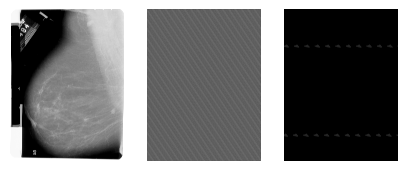

In [9]:
def show_images_from_hdf5(hdf5_file):
    # Open the HDF5 file
    with h5py.File(hdf5_file, 'r') as hdf5:
        dataset = hdf5['images']
        num_images = dataset.shape[0]
        
        # Display images
        plt.figure(figsize=(5, 5))
        for i in range(num_images):
            plt.subplot(1, num_images, i + 1)
            img = dataset[i]
            if img.shape[2] == 1:  # Grayscale image
                plt.imshow(img.squeeze(), cmap='gray')
            else:  # RGB image
                plt.imshow(img)
            plt.axis('off')
        plt.show()
show_images_from_hdf5(hdf5_file)

In [11]:
import os
import numpy as np
import h5py
from PIL import Image
import matplotlib.pyplot as plt

def images_to_hdf5(image_folder, hdf5_file):
    # Create an HDF5 file
    with h5py.File(hdf5_file, 'w') as hdf5:
        images = [f for f in os.listdir(image_folder) if os.path.isfile(os.path.join(image_folder, f))]
        images.sort()  # Optional: sort the images by filename

        # Determine the shape of the images
        first_image_path = os.path.join(image_folder, images[0])
        with Image.open(first_image_path) as img:
            img_array = np.array(img)
            if len(img_array.shape) == 2:  # Grayscale image
                height, width = img_array.shape
                channels = 1
            else:  # RGB image
                height, width, channels = img_array.shape

        # Create a dataset in HDF5 file
        dataset = hdf5.create_dataset('images', (len(images), height, width, channels), dtype=np.uint8)

        for i, image_name in enumerate(images):
            image_path = os.path.join(image_folder, image_name)
            with Image.open(image_path) as img:
                img_array = np.array(img)
                if len(img_array.shape) == 2:  # Grayscale image
                    img_array = img_array[..., np.newaxis]  # Add channel dimension
                dataset[i] = img_array

        print(f'Converted {len(images)} images to {hdf5_file}')

def show_images_from_hdf5(hdf5_file):
    # Open the HDF5 file
    with h5py.File(hdf5_file, 'r') as hdf5:
        dataset = hdf5['images']
        num_images = dataset.shape[0]
        
        # Determine the grid size
        num_cols = min(num_images, 10)  # Number of columns for the grid
        num_rows = (num_images + num_cols - 1) // num_cols  # Number of rows
        
        # Create a figure with subplots
        plt.figure(figsize=(num_cols * 2, num_rows * 2))
        for i in range(num_images):
            plt.subplot(num_rows, num_cols, i + 1)
            img = dataset[i]
            if img.shape[-1] == 1:  # Grayscale image
                plt.imshow(img.squeeze(), cmap='gray')
            else:  # RGB image
                plt.imshow(img)
            plt.axis('off')
        
        plt.tight_layout()
        plt.show()

# Example usage
image_folder = 'images'  # Replace with your folder containing images
hdf5_file = 'output5.hdf5'  # The output HDF5 file

# Convert images to HDF5
images_to_hdf5(image_folder, hdf5_file)

# Display images from HDF5
show_images_from_hdf5(hdf5_file)


TypeError: Can't broadcast (211, 226, 1) -> (5491, 4126, 1)

In [18]:
import os
import numpy as np
import h5py
from PIL import Image
import matplotlib.pyplot as plt

def images_to_hdf5(image_folder, hdf5_file, image_size=(256, 256)):
    # Create an HDF5 file
    with h5py.File(hdf5_file, 'w') as hdf5:
        images = [f for f in os.listdir(image_folder) if os.path.isfile(os.path.join(image_folder, f))]
        images.sort()  # Optional: sort the images by filename

        # Determine the shape of the images from the first image
        first_image_path = os.path.join(image_folder, images[0])
        with Image.open(first_image_path) as img:
            img = img.resize(image_size)  # Resize to common size
            img_array = np.array(img)
            if len(img_array.shape) == 2:  # Grayscale image
                height, width = img_array.shape
                channels = 1
            else:  # RGB image (assume 3 channels)
                height, width, channels = img_array.shape

        # Create a dataset in HDF5 file
        dataset = hdf5.create_dataset('images', (len(images), height, width, channels), dtype=np.uint8)

        for i, image_name in enumerate(images):
            image_path = os.path.join(image_folder, image_name)
            with Image.open(image_path) as img:
                img = img.resize(image_size)  # Resize to common size
                img_array = np.array(img)
                if len(img_array.shape) == 2:  # Grayscale image
                    img_array = np.expand_dims(img_array, axis=-1)  # Add channel dimension
                elif img_array.shape[2] == 4:  # RGBA image
                    img_array = img_array[..., :3]  # Convert RGBA to RGB
                dataset[i] = img_array

        print(f'Converted {len(images)} images to {hdf5_file}')

def show_images_from_hdf5(hdf5_file):
    # Open the HDF5 file
    with h5py.File(hdf5_file, 'r') as hdf5:
        dataset = hdf5['images']
        num_images = dataset.shape[0]
        
        # Determine the grid size
        num_cols = min(num_images, 10)  # Number of columns for the grid
        num_rows = (num_images + num_cols - 1) // num_cols  # Number of rows
        
        # Create a figure with subplots
        plt.figure(figsize=(num_cols * 2, num_rows * 2))
        for i in range(num_images):
            plt.subplot(num_rows, num_cols, i + 1)
            img = dataset[i]
            if img.shape[-1] == 1:  # Grayscale image
                plt.imshow(img.squeeze(), cmap='gray')
            else:  # RGB image
                plt.imshow(img)
            plt.axis('off')
        
        plt.tight_layout()
        plt.show()

# Example usage
image_folder = 'images'  # Replace with your folder containing images
hdf5_file = 'output.hdf5'  # The output HDF5 file

# Convert images to HDF5
images_to_hdf5(image_folder, hdf5_file, image_size=(256, 256))  # Resize to (256, 256)

# Display images from HDF5
show_images_from_hdf5(hdf5_file)


TypeError: Can't broadcast (256, 256, 3) -> (256, 256, 1)

Converted 263 images to output.hdf5


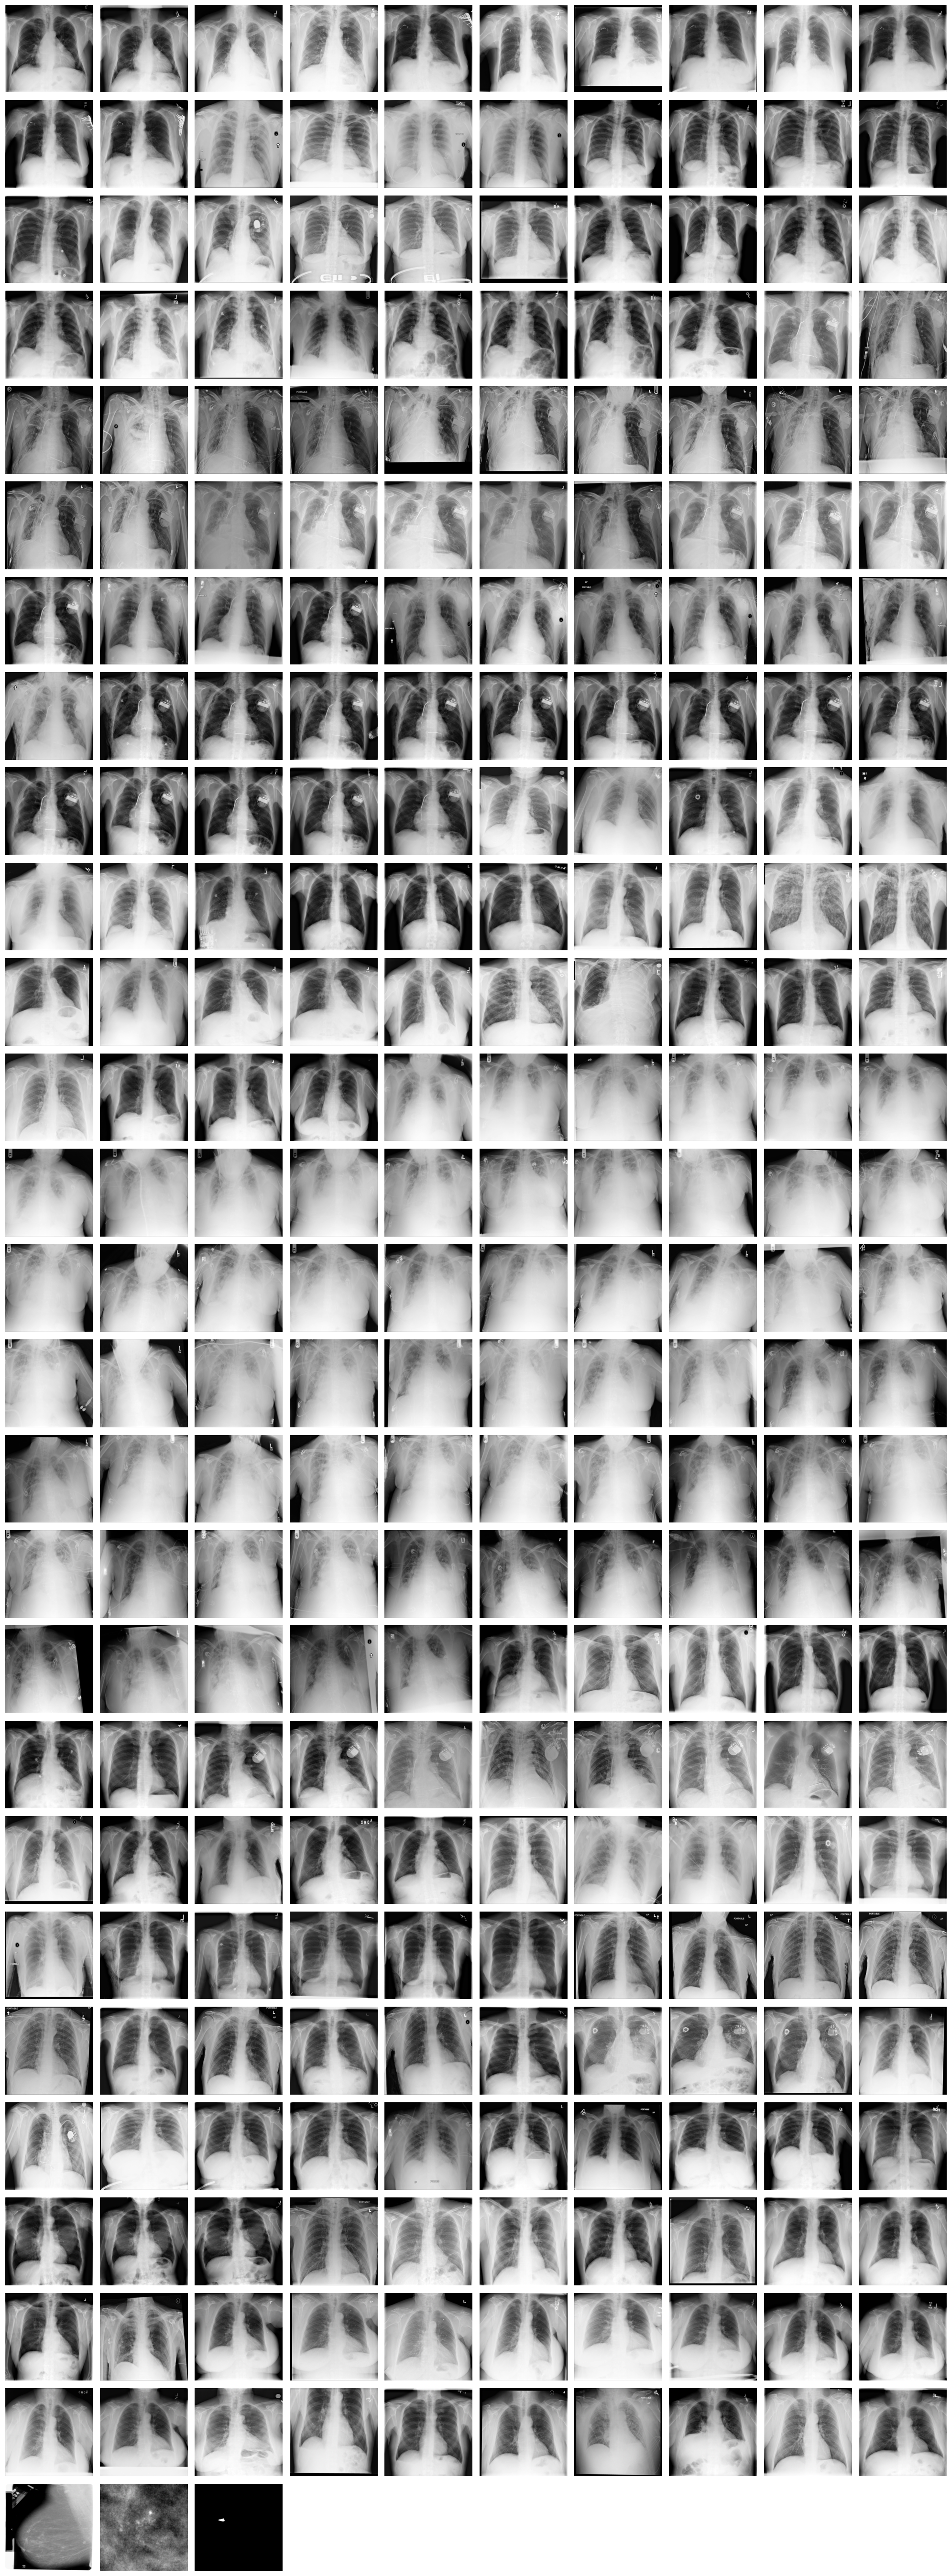

In [19]:
import os
import numpy as np
import h5py
from PIL import Image
import matplotlib.pyplot as plt

def images_to_hdf5(image_folder, hdf5_file, image_size=(256, 256)):
    # Create an HDF5 file
    with h5py.File(hdf5_file, 'w') as hdf5:
        images = [f for f in os.listdir(image_folder) if os.path.isfile(os.path.join(image_folder, f))]
        images.sort()  # Optional: sort the images by filename

        # Determine the shape of the images from the first image
        first_image_path = os.path.join(image_folder, images[0])
        with Image.open(first_image_path) as img:
            img = img.resize(image_size)  # Resize to common size
            img_array = np.array(img)
            if len(img_array.shape) == 2:  # Grayscale image
                height, width = img_array.shape
                channels = 1
            else:  # RGB image
                height, width, channels = img_array.shape

        # Create a dataset in HDF5 file
        dataset = hdf5.create_dataset('images', (len(images), height, width, channels), dtype=np.uint8)

        for i, image_name in enumerate(images):
            image_path = os.path.join(image_folder, image_name)
            with Image.open(image_path) as img:
                img = img.resize(image_size)  # Resize to common size
                img_array = np.array(img)
                if len(img_array.shape) == 2:  # Grayscale image
                    img_array = np.expand_dims(img_array, axis=-1)  # Add channel dimension
                elif img_array.shape[2] == 4:  # RGBA image
                    img_array = img_array[..., :3]  # Convert RGBA to RGB
                # Ensure the img_array has the correct shape
                img_array = img_array[:, :, :channels]  # Trim or pad channels to match dataset shape
                dataset[i] = img_array

        print(f'Converted {len(images)} images to {hdf5_file}')

def show_images_from_hdf5(hdf5_file):
    # Open the HDF5 file
    with h5py.File(hdf5_file, 'r') as hdf5:
        dataset = hdf5['images']
        num_images = dataset.shape[0]
        
        # Determine the grid size
        num_cols = min(num_images, 10)  # Number of columns for the grid
        num_rows = (num_images + num_cols - 1) // num_cols  # Number of rows
        
        # Create a figure with subplots
        plt.figure(figsize=(num_cols * 2, num_rows * 2))
        for i in range(num_images):
            plt.subplot(num_rows, num_cols, i + 1)
            img = dataset[i]
            if img.shape[-1] == 1:  # Grayscale image
                plt.imshow(img.squeeze(), cmap='gray')
            else:  # RGB image
                plt.imshow(img)
            plt.axis('off')
        
        plt.tight_layout()
        plt.show()

# Example usage
image_folder = 'images'  # Replace with your folder containing images
hdf5_file = 'output.hdf5'  # The output HDF5 file

# Convert images to HDF5
images_to_hdf5(image_folder, hdf5_file, image_size=(256, 256))  # Resize to (256, 256)

# Display images from HDF5
show_images_from_hdf5(hdf5_file)


In [24]:
with h5py.File('output.hdf5', 'r') as file:
    # Access the dataset
    dataset = file['images']
    print(dataset[0])

[[[194]
  [189]
  [181]
  ...
  [  5]
  [  5]
  [  3]]

 [[187]
  [179]
  [151]
  ...
  [  5]
  [  5]
  [  3]]

 [[176]
  [149]
  [ 93]
  ...
  [  5]
  [  5]
  [  3]]

 ...

 [[254]
  [238]
  [200]
  ...
  [  0]
  [  0]
  [  0]]

 [[254]
  [238]
  [200]
  ...
  [  2]
  [  0]
  [  0]]

 [[255]
  [240]
  [199]
  ...
  [  7]
  [  0]
  [  0]]]
